In [1]:
import os

from dotenv import load_dotenv
load_dotenv()
import datasets
from datasets import DatasetDict
from datasets import load_dataset
import datasets
import torch
import json
from huggingface_hub import HfApi

import numpy as np

from scipy.stats import norm
from scipy.stats import f
from scipy.stats import lognorm
import plotting
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
import torch
import datasets
from datasets import load_dataset
import util



DEBUG = False


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


FileNotFoundError: [Errno 2] No such file or directory

In [3]:


from itertools import product

import config

jobs = [(d+"_"+t+"_"+"random", d,t) for d, t in product(config.datasets, config.model_types)]

./influence_mean_normalized/babylm_2024_10m_curriculum_llama_random/babylm_2024_10m_curriculum_train[0%:100%]_babylm_2024_10m_curriculum_train[0%:100%]


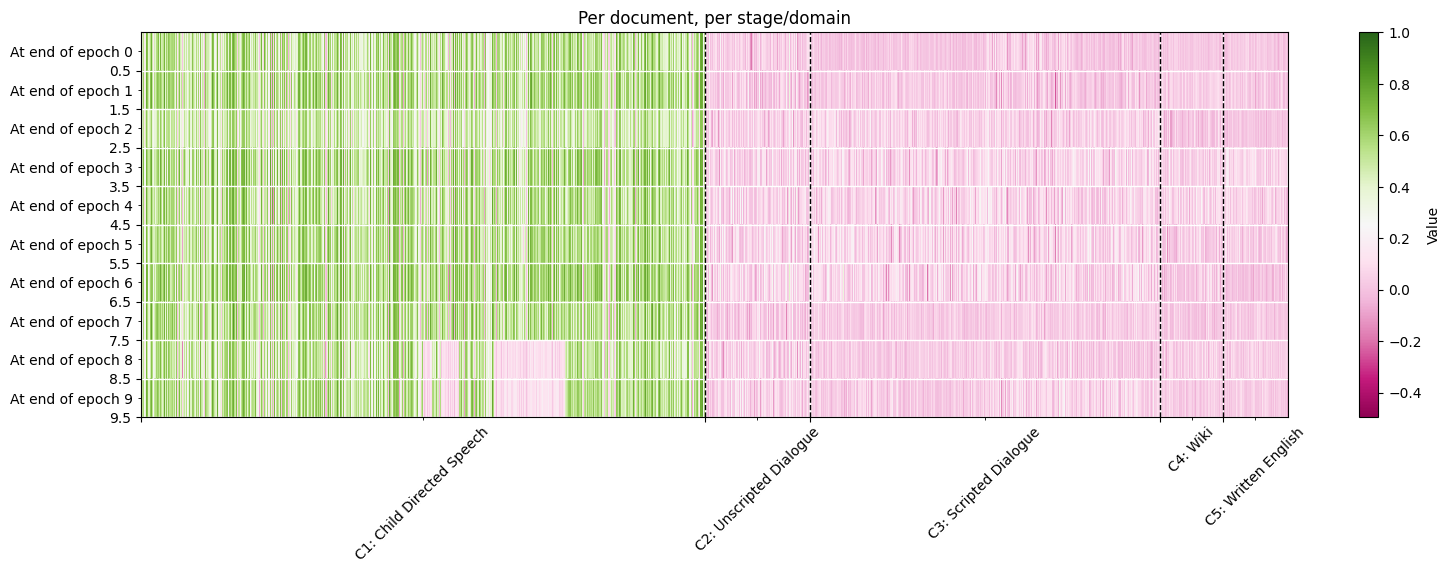

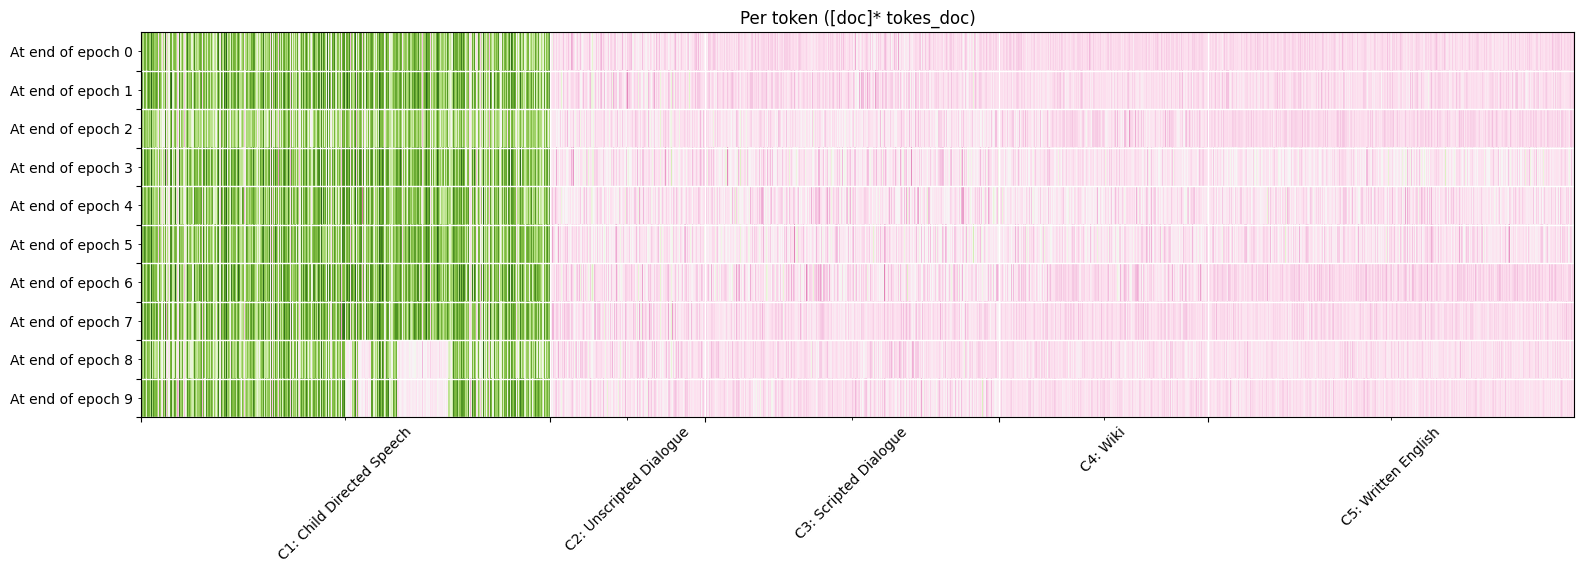

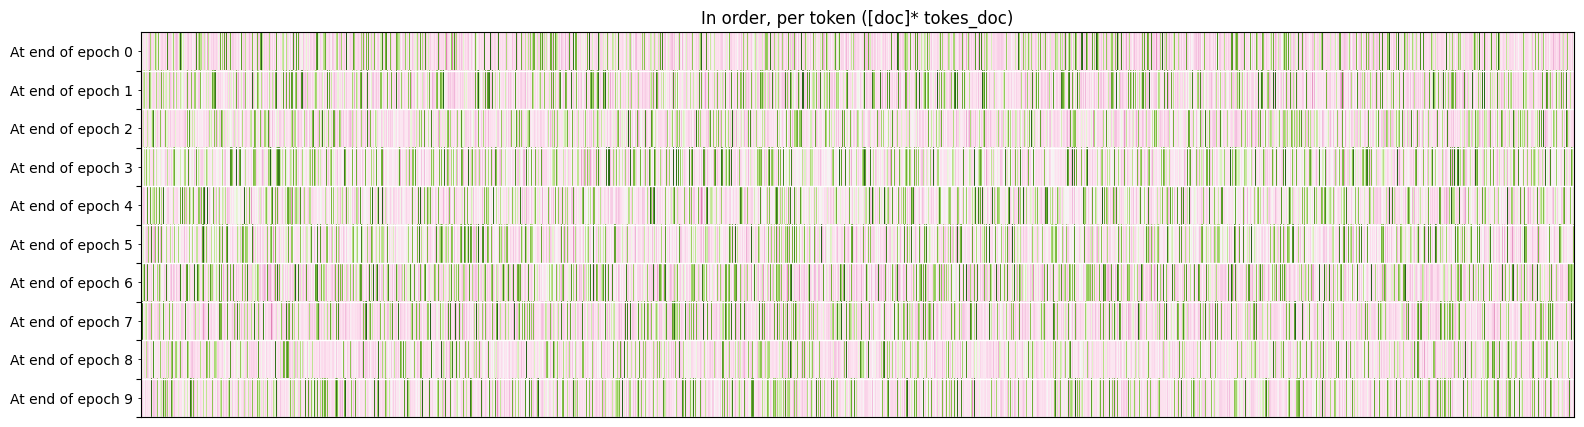

./influence_mean_normalized/stratified_equitoken_10m_curriculum_llama_random/stratified_equitoken_10m_curriculum_train[0%:100%]_stratified_equitoken_10m_curriculum_train[0%:100%]


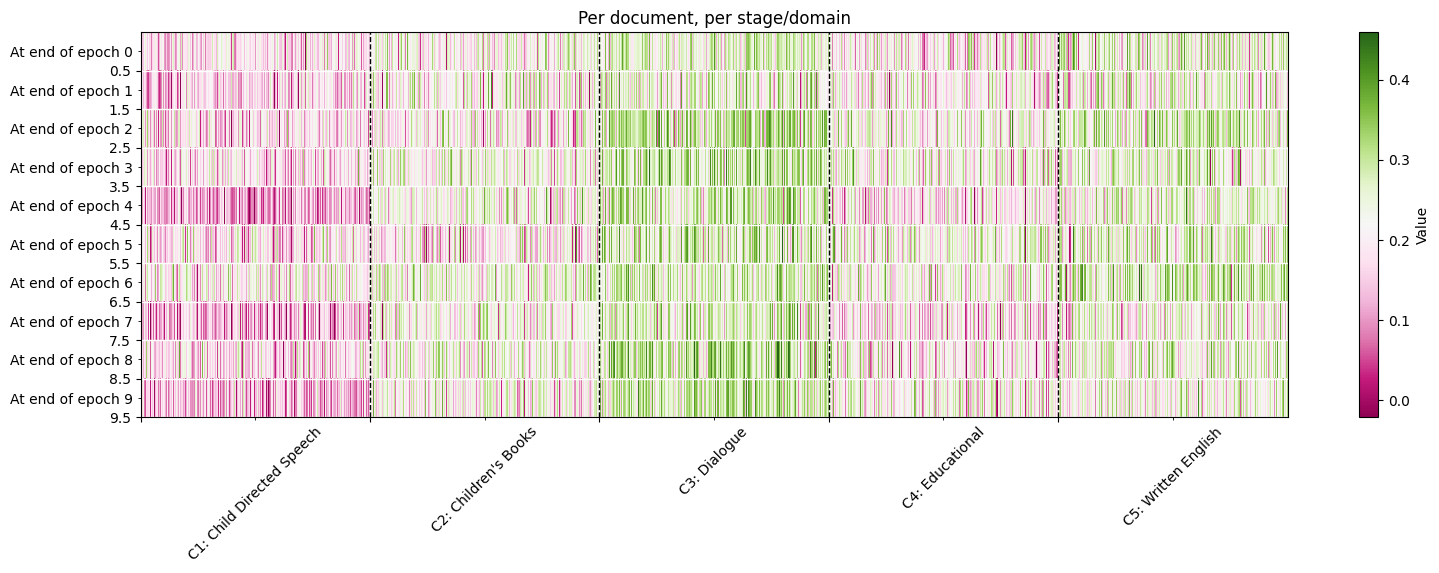

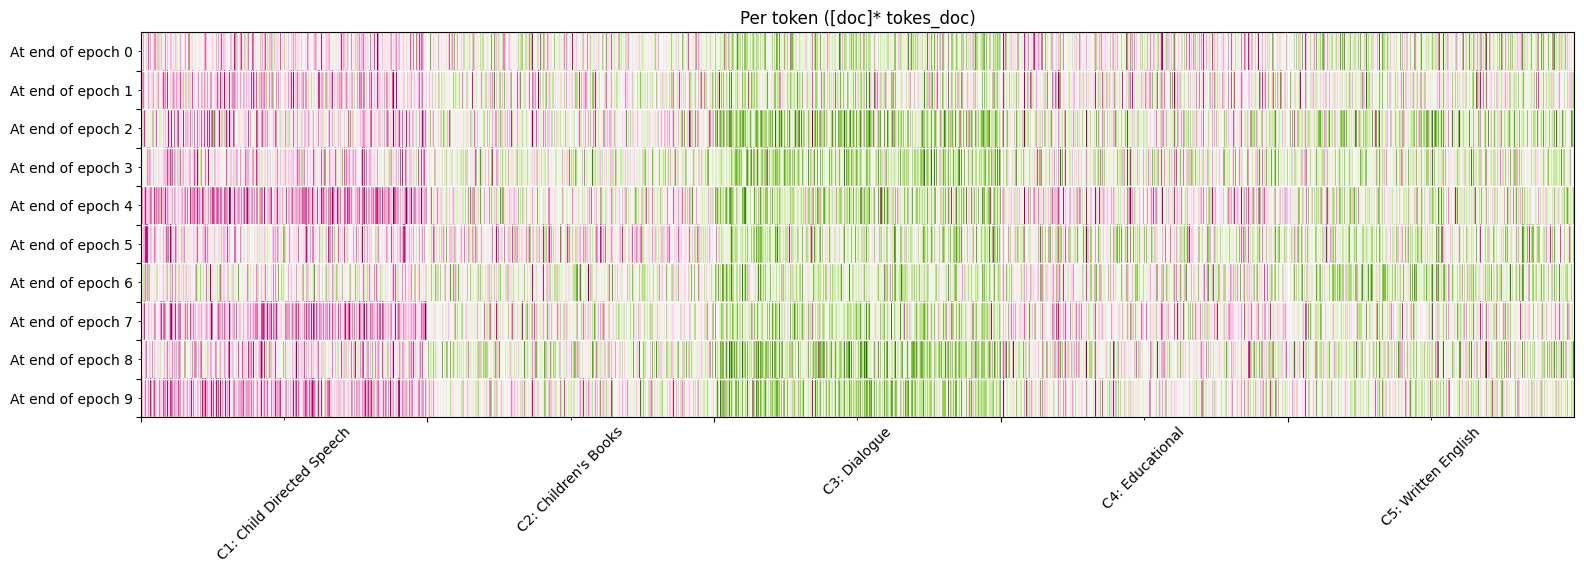

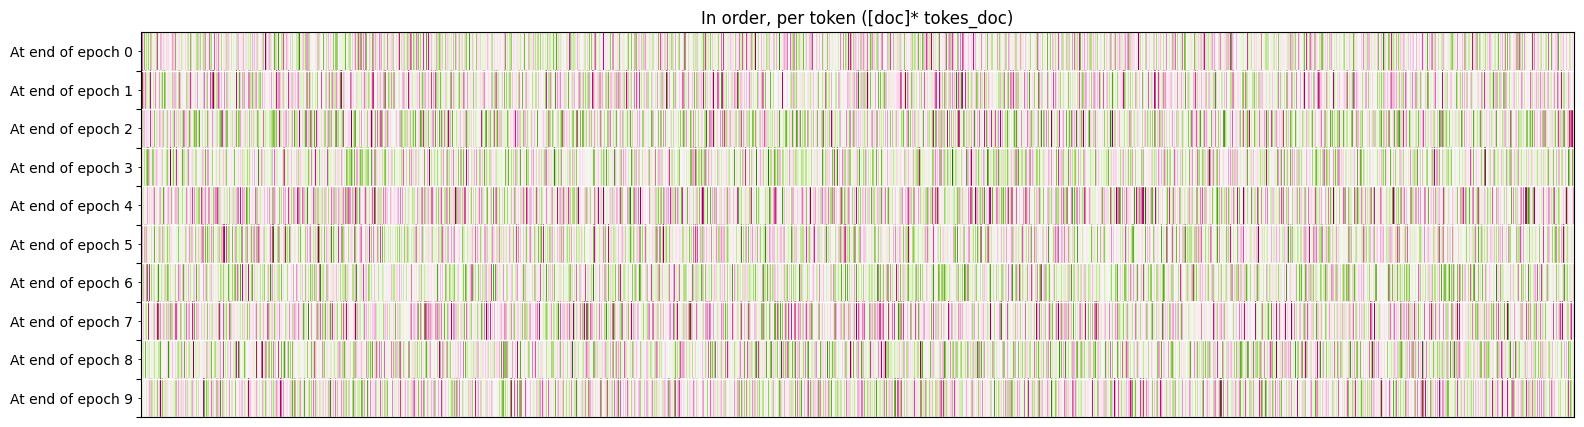

./influence_mean_normalized/stratified_10m_curriculum_llama_random/stratified_10m_curriculum_train[0%:100%]_stratified_10m_curriculum_train[0%:100%]


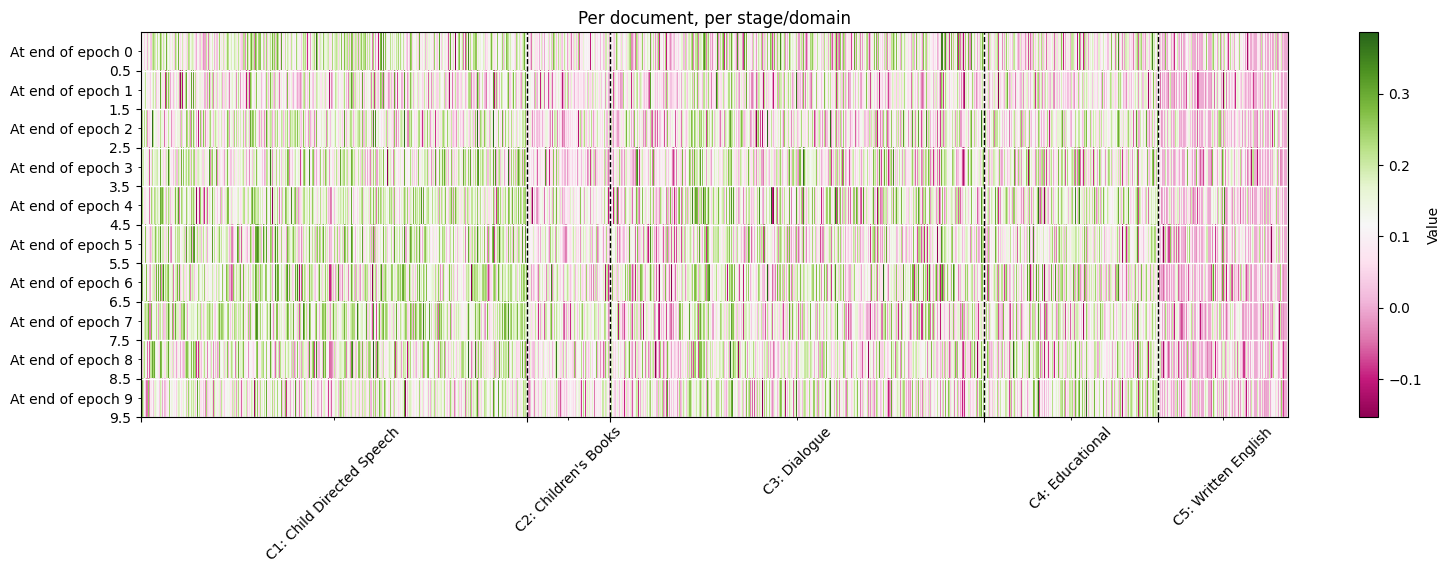

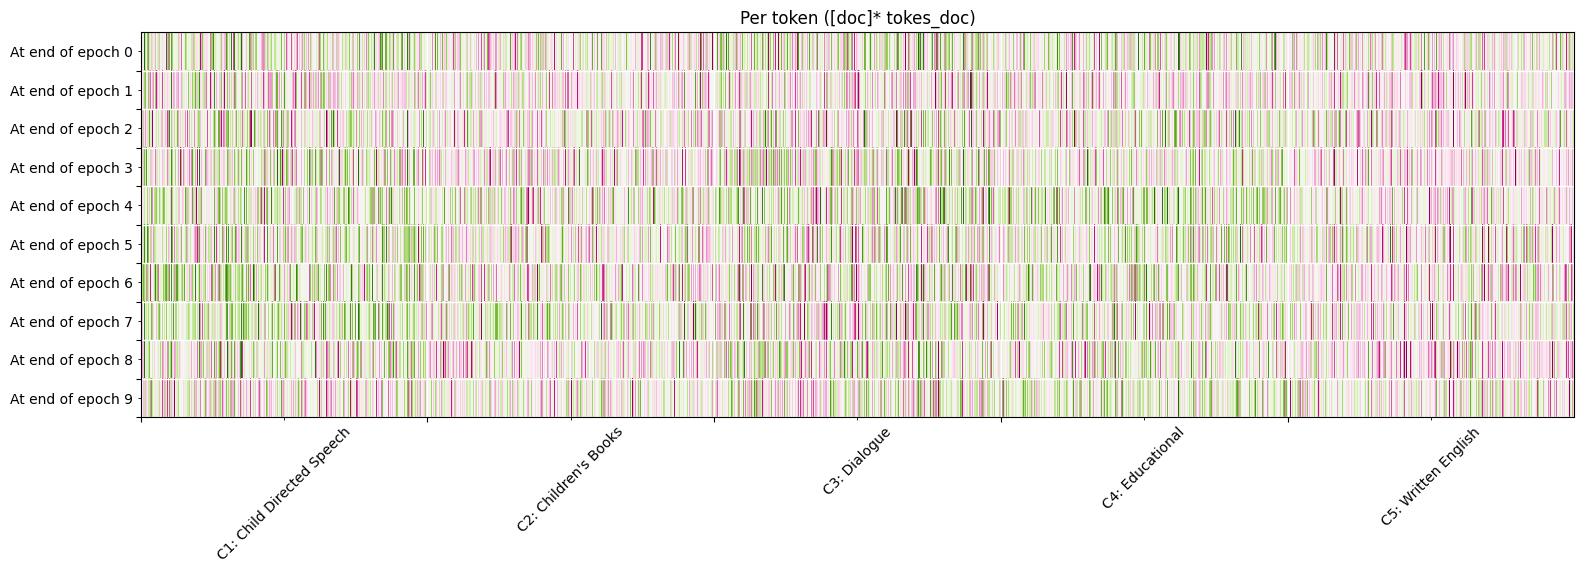

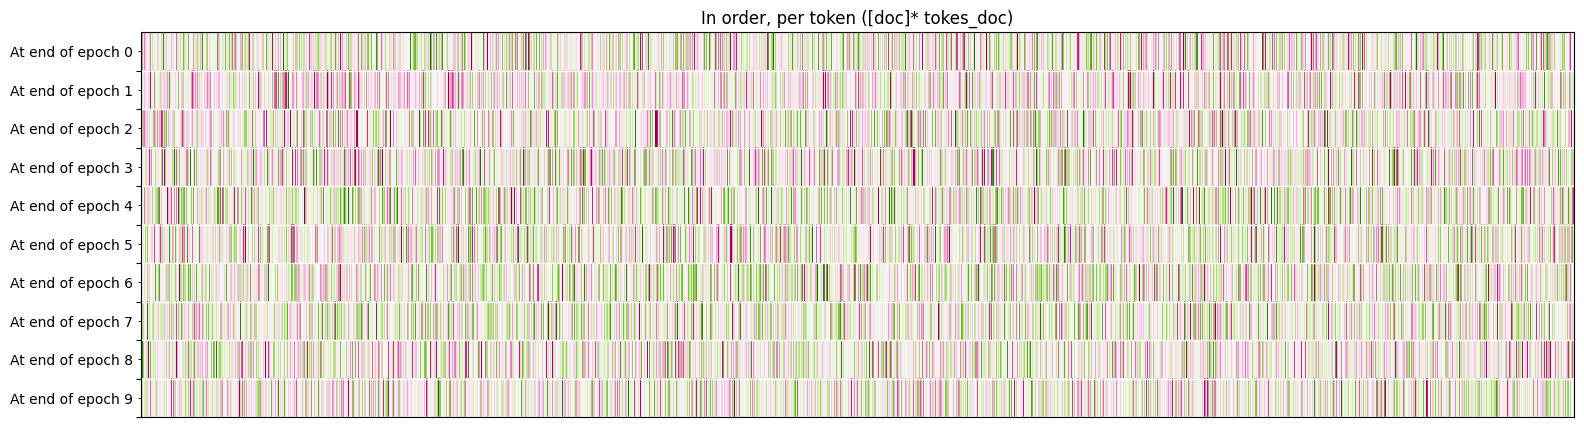

In [4]:
import plotting
import matplotlib.pyplot as plt

# load influence data
for model_name, dataset_name, model_type in jobs:

    assert dataset_name in model_name


    RANDOM_CURRICULUM_NAME ="random.pt"


    influence_output_dir = os.path.join("./influence_mean_normalized", os.path.basename(model_name), "_".join([(os.path.basename(dataset_name) +"_"+f"train[0%:100%]")]*2))
    print(influence_output_dir)
    dataset = load_dataset(dataset_name)["train"]
    curriculum = util.get_curriculum(dataset_name, RANDOM_CURRICULUM_NAME)

    df = pd.DataFrame({int(result_checkpoint.replace("checkpoint-","")): torch.load(os.path.join(influence_output_dir,result_checkpoint),weights_only=True,map_location="cpu").numpy().flatten() for result_checkpoint in os.listdir(influence_output_dir)})
    df.sort_index(axis=1)
  
    df = df.reindex(sorted(df.columns, reverse=False), axis=1)
    influence_cols = df.columns
    df["total"] = df.sum(axis=1)
    df[["text", "source","stage"]] = dataset.to_pandas()
    df["document_lenght"] = df["text"].str.split().str.len()

    
    plotting.plot_per_document_per_stage(df[influence_cols.to_list() + ["stage"]], curriculum)
    plotting.plot_per_token_per_stage(df[influence_cols.to_list() + ["stage","document_lenght"]], curriculum)
    plotting.plot_per_token_in_order(df[influence_cols.to_list() + ["stage","document_lenght"]], curriculum)
    plt.show()